# Tea Fermentation Monitoring with CNN

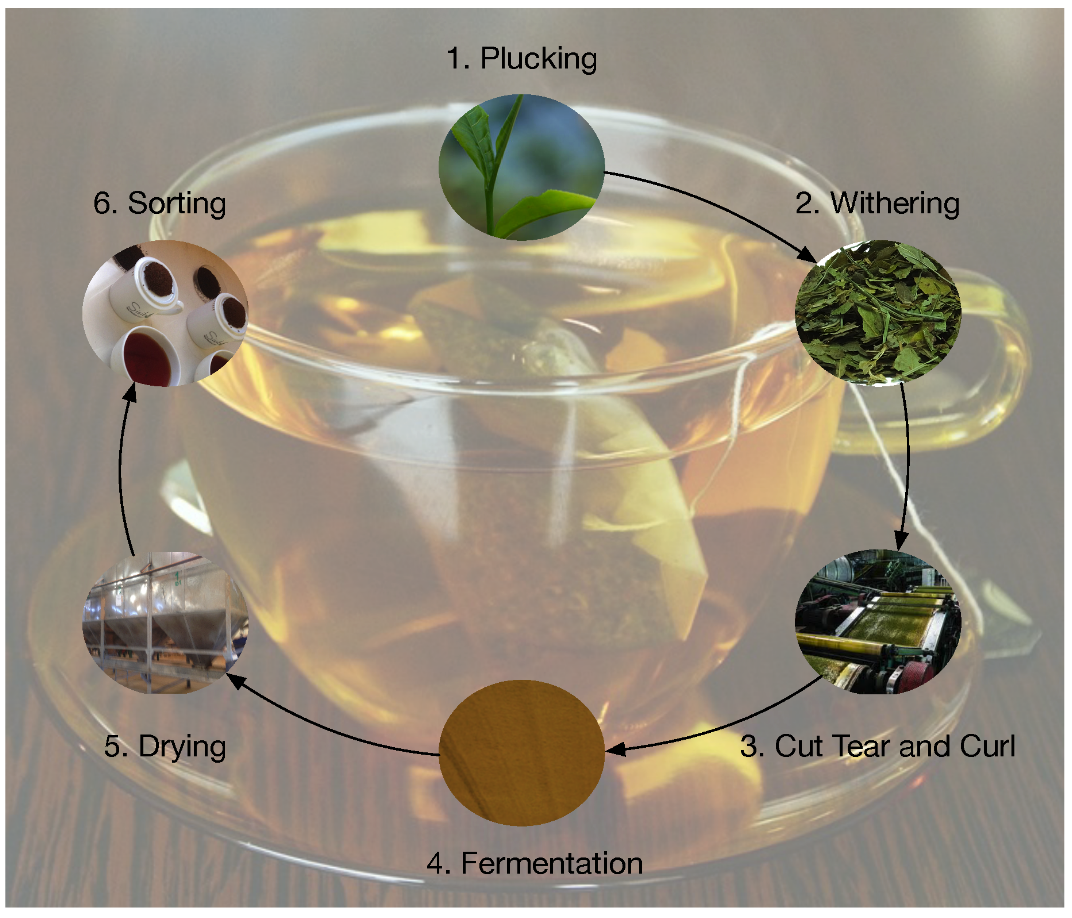

In [2]:
#Importing relevant packages
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import tensorflow as tf

# Dataset

In [3]:
image_size = (150, 150)
batch_size = 4800
train_ds= keras.preprocessing.image_dataset_from_directory(
    "/Users/kipkemoivincent/Desktop/Project/New Data /Black tea fermentation dataset",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)
val_ds= keras.preprocessing.image_dataset_from_directory(
    "/Users/kipkemoivincent/Desktop/Project/New Data /Black tea fermentation dataset",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

Found 6000 files belonging to 4 classes.
Using 4800 files for training.
Found 6000 files belonging to 4 classes.
Using 1200 files for validation.


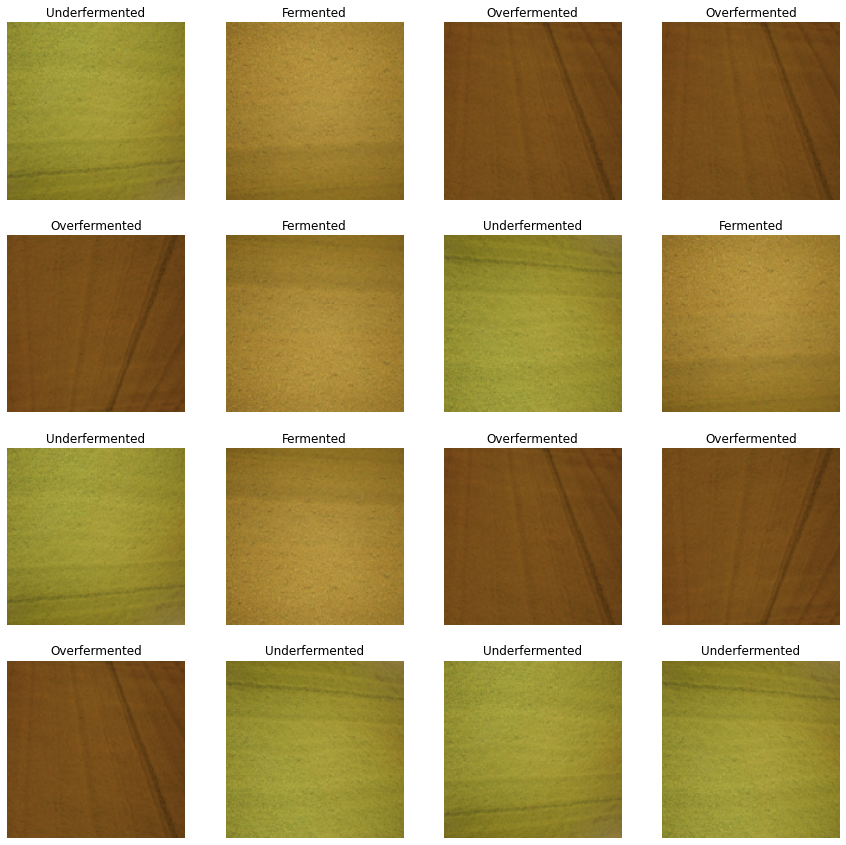

In [4]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    labels=[int(labels[i]) for i in range(len(labels))]
    for i in range(len(labels)):
        if int(labels[i])==1:
            labels[i]='Underfermented'
        elif int(labels[i])==2:
            labels[i]='Fermented'
        else:
            labels[i]='Overfermented'
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(labels[i])
        plt.axis("off")

In [5]:
X_train1=[]
y_train1=[]
X_test1=[]
y_test1=[]
for images, labels in train_ds:
    X_train1.append(images)
    y_train1.append(labels)
for images, labels in val_ds:
    X_train1.append(images)
    y_train1.append(labels)

In [6]:
X_train=np.array(X_train1[0])
X_test=np.array(X_train1[1])
y_train=np.array(y_train1[0])
y_test=np.array(y_train1[1])

In [7]:
#X_train=X_train.reshape(4800,67500)
#X_test=X_test.reshape(1200,67500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train.shape

(4800, 150, 150, 3)

## Normalizing the data to help with the training

In [7]:
X_train /= 255
X_test /= 255

In [8]:
y_train1=y_train-1
y_test1=y_test-1
Y_train=tf.keras.utils.to_categorical(y_train1, num_classes=3)
Y_test=tf.keras.utils.to_categorical(y_test1, num_classes=3)
Y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

# (a) CNN1 (with Keras)

In [9]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), 
                 padding='valid', activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history =model.fit(X_train, Y_train, batch_size=128, epochs=4, validation_data=(X_test, Y_test))

Epoch 1/4
38/38 [==============================] - 129s 3s/step - loss: 11.1602 - accuracy: 0.5020 - val_loss: 0.0624 - val_accuracy: 1.0000
Epoch 2/4
38/38 [==============================] - 138s 4s/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 3/4
38/38 [==============================] - 118s 3s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/4
38/38 [==============================] - 120s 3s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000


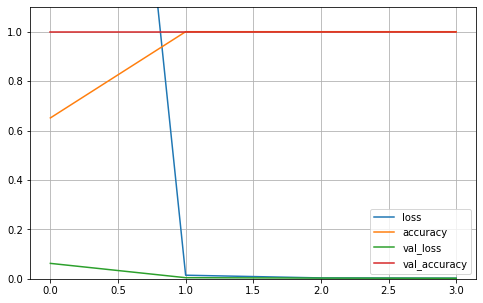

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

# (b) Fully connected NN

In [11]:
X_train=X_train.reshape(4800,67500)
X_test=X_test.reshape(1200,67500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(67500,), activation='relu'))
# output layer
model.add(Dense(3, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
history=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               6750100   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 6,750,403
Trainable params: 6,750,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
38/38 [==============================] - 6s 123ms/step - loss: 13.7190 - accuracy: 0.3540 - val_loss: 1.0989 - val_accuracy: 0.3275
Epoch 2/10
38/38 [==============================] - 5s 120ms/step - loss: 1.0988 - accuracy: 0.3298 - val_loss: 1.0989 - val_accuracy: 0.3275
Epoch 3/10
38/38 [==============================] - 5s 120ms/step - loss: 1.0987 - accuracy: 0.3274 - val_loss: 1.0989 - val_accuracy: 0.3275
Epoch 4/10
38/38 [==============================] - 4s 102ms/step - loss: 1.098

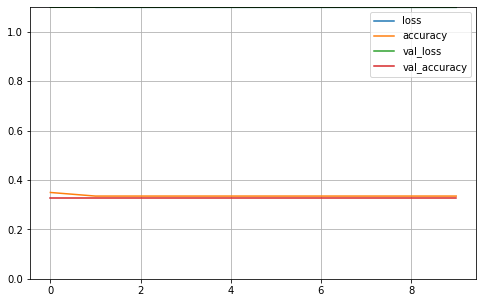

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()